# Predicting the Sale Price of Bulldozers using Machine Learning 🚜

## 1. Overview

The Bulldozer Price Prediction project aims to predict the sale price of bulldozers based on their characteristics. This project focuses on understanding how various features influence the pricing of bulldozers, utilizing historical sales data to forecast future prices.

### Problem Type

This is a **regression problem** since we are predicting a continuous numerical value (the sale price in USD). Additionally, as we are forecasting future sales based on past sales data, it can also be classified as a **time series** or **forecasting problem**.

### Dataset

The data used in this project is sourced from the [Kaggle Bluebook for Bulldozers competition](https://www.kaggle.com/c/bluebook-for-bulldozers/overview). The dataset includes various features related to bulldozer characteristics, such as:

- Make year
- Base model
- Model series
- State of sale (e.g., which US state it was sold in)
- Drive system
- And more...

### Evaluation Metric

The performance of the model will be evaluated using the **Root Mean Square Log Error (RMSLE)**, which measures the accuracy of the predicted sale prices compared to the actual prices.

### Techniques Used

The techniques and methodologies applied in this project are inspired by the [fast.ai machine learning course](https://course18.fast.ai/ml). The project involves data preprocessing, feature engineering, model selection, and evaluation to achieve the best predictive performance.



## 2. Data 📊

Looking at the [dataset from Kaggle](https://www.kaggle.com/c/bluebook-for-bulldozers/data), we see that it contains historical sales data of bulldozers, including details like model type, size, sale date, and more.

There are 3 datasets:

1. **Train.csv** 🏗️ - Historical bulldozer sales examples up to 2011 (close to 400,000 examples with 50+ different attributes, including `SalePrice`, which is the **target variable**).
2. **Valid.csv** 📅 - Historical bulldozer sales examples from January 1, 2012, to April 30, 2012 (close to 12,000 examples with the same attributes as **Train.csv**).
3. **Test.csv** 🧪 - Historical bulldozer sales examples from May 1, 2012, to November 2012 (close to 12,000 examples but missing the `SalePrice` attribute, as this is what we'll be trying to predict).

> **Note:** You can download the `bluebook-for-bulldozers` dataset directly from Kaggle. Alternatively, you can also [download it directly from the course GitHub](https://github.com/mrdbourke/zero-to-mastery-ml/raw/refs/heads/master/data/bluebook-for-bulldozers.zip).

## 3. Evaluation 📏

For this problem, [Kaggle has set the evaluation metric to be Root Mean Squared Log Error (RMSLE)](https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation). As with many regression evaluations, the goal will be to get this value as low as possible (a low error value means our model's predictions are close to the actual values).

To see how well our model is doing, we'll calculate the RMSLE and then compare our results to others on the [Kaggle leaderboard](https://www.kaggle.com/c/bluebook-for-bulldozers/leaderboard).

## 4. Features 🛠️

Features are different parts and attributes of the data.

During this step, you'll want to start finding out what you can about the data. One of the most common ways to do this is to create a **data dictionary**.

For this dataset, Kaggle provides a data dictionary that contains information about what each attribute of the dataset means.

For example:

| Variable Name | Description  | Variable Type |
|------|-----|-----|
| SalesID   | unique identifier of a particular sale of a machine at auction  | Independent  variable |
| MachineID  | identifier for a particular machine; machines may have multiple sales  | Independent  variable |
| ModelID | identifier for a unique machine model (i.e. fiModelDesc) | Independent  variable |
| datasource  | source of the sale record; some sources are more diligent about reporting attributes of the machine than others. Note that a particular datasource may report on multiple auctioneerIDs. | Independent  variable |
| auctioneerID  | identifier of a particular auctioneer, i.e. company that sold the machine at auction. Not the same as datasource.  | Independent  variable |
| YearMade  | year of manufacturer of the Machine  | Independent  variable |
| MachineHoursCurrentMeter | current usage of the machine in hours at time of sale (saledate); null or 0 means no hours have been reported for that sale | Independent  variable |
| UsageBand | value (low, medium, high) calculated comparing this particular Machine-Sale hours to average usage for the fiBaseModel; e.g. 'Low' means this machine has fewer hours given its lifespan relative to the average of fiBaseModel. | Independent  variable |
| Saledate   | time of sale | Independent  variable |
| fiModelDesc  | Description of a unique machine model (see ModelID); concatenation of fiBaseModel & fiSecondaryDesc & fiModelSeries & fiModelDescriptor  | Independent  variable |
| State | US State in which sale occurred | Independent  variable |
| Drive_System | machine configuration; typically describes whether 2 or 4 wheel drive  | Independent  variable |
| Enclosure  | machine configuration - does the machine have an enclosed cab or not | Independent  variable |
| Forks  | machine configuration - attachment used for lifting  | Independent  variable |
| Pad_Type | machine configuration - type of treads a crawler machine uses | Independent  variable |
| Ride_Control  | machine configuration - optional feature on loaders to make the ride smoother | Independent  variable |
| Transmission | machine configuration - describes type of transmission; typically automatic or manual | Independent  variable |
| ... | ... | ... |
| SalePrice | cost of sale in USD | Target/dependent variable |

You can download the full version of this file directly from the [Kaggle competition page](https://www.kaggle.com/c/bluebook-for-bulldozers/download/Bnl6RAHA0enbg0UfAvGA%2Fversions%2FwBG4f35Q8mAbfkzwCeZn%2Ffiles%2FData%20Dictionary.xlsx) (Kaggle account required) or view it [on Google Sheets](https://docs.google.com/spreadsheets/d/18ly-bLR8sbDJLITkWG7ozKm8l3RyieQ2Fpgix-beSYI/edit?usp=sharing).

With all of this being known, let's get started!

First, we'll import the dataset and start exploring.

## Importing the Data and Preparing it for Modeling 📥🔧

In [1]:
# Import data analysis tools
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Print the versions we're using (as long as your versions are equal or higher than these, the code should work)
print(f"pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"matplotlib version: {matplotlib.__version__}")

pandas version: 2.2.3
NumPy version: 2.2.2
matplotlib version: 3.10.0


In [2]:
# Import the training and validation set
dataset_path = 'data/bluebook-for-bulldozers/TrainAndValid.csv'  # Update with your actual path
df = pd.read_csv(filepath_or_buffer=dataset_path, low_memory=False)

In [3]:
# Get info about DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

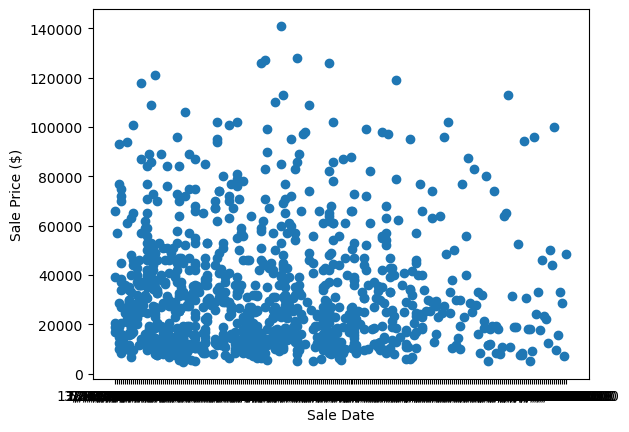

In [4]:
fig, ax = plt.subplots()
ax.scatter(x=df["saledate"][:1000], # visualize the first 1000 values
           y=df["SalePrice"][:1000])
ax.set_xlabel("Sale Date")
ax.set_ylabel("Sale Price ($)");


Turning the `saledate` column into `datetime` format.

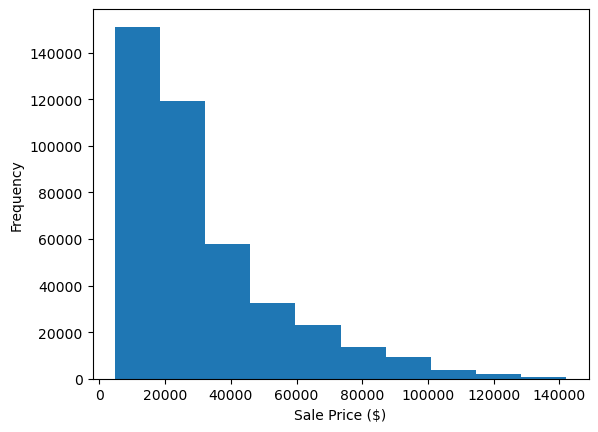

In [5]:
# View SalePrice distribution
df.SalePrice.plot.hist(xlabel="Sale Price ($)");

#### Parsing dates

In [6]:
df = pd.read_csv(filepath_or_buffer=dataset_path,
                 low_memory=False, # set low_memory=False to prevent mixed data types warning
                 parse_dates=["saledate"]) # can use the parse_dates parameter and specify which column to treat as a date column

# With parse_dates... check dtype of "saledate"
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  object        
 11  fiBaseModel               412698 non-null  object        
 12  fi

In [7]:
df["saledate"][:10]

0   2006-11-16
1   2004-03-26
2   2004-02-26
3   2011-05-19
4   2009-07-23
5   2008-12-18
6   2004-08-26
7   2005-11-17
8   2009-08-27
9   2007-08-09
Name: saledate, dtype: datetime64[ns]

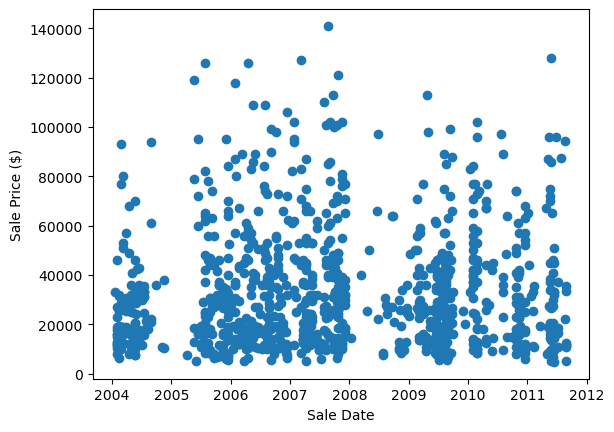

In [8]:
fig, ax = plt.subplots()
ax.scatter(x=df["saledate"][:1000], # visualize the first 1000 values
           y=df["SalePrice"][:1000])
ax.set_xlabel("Sale Date")
ax.set_ylabel("Sale Price ($)");

####  Sorting our DataFrame by saledate

In [9]:
# Sort DataFrame in date order
df.sort_values(by=["saledate"], inplace=True, ascending=True)
df.saledate.head(10), df.saledate.tail(10)

(205615   1989-01-17
 274835   1989-01-31
 141296   1989-01-31
 212552   1989-01-31
 62755    1989-01-31
 54653    1989-01-31
 81383    1989-01-31
 204924   1989-01-31
 135376   1989-01-31
 113390   1989-01-31
 Name: saledate, dtype: datetime64[ns],
 409202   2012-04-28
 408976   2012-04-28
 411695   2012-04-28
 411319   2012-04-28
 408889   2012-04-28
 410879   2012-04-28
 412476   2012-04-28
 411927   2012-04-28
 407124   2012-04-28
 409203   2012-04-28
 Name: saledate, dtype: datetime64[ns])

#### Adding extra features to our DataFrame


For now, we'll use our `saledate` column to add extra features such as:

* Year of sale
* Month of sale
* Day of sale
* Day of week sale (e.g. Monday = 1, Tuesday = 2)
* Day of year sale (e.g. January 1st = 1, January 2nd = 2)


In [10]:
# Make a copy of the original DataFrame to perform edits on
df_tmp = df.copy()

In [11]:
# Add datetime parameters for saledate
df_tmp["saleYear"] = df_tmp.saledate.dt.year
df_tmp["saleMonth"] = df_tmp.saledate.dt.month
df_tmp["saleDay"] = df_tmp.saledate.dt.day
df_tmp["saleDayofweek"] = df_tmp.saledate.dt.dayofweek
df_tmp["saleDayofyear"] = df_tmp.saledate.dt.dayofyear

# Drop original saledate column
df_tmp.drop("saledate", axis=1, inplace=True)

In [12]:
# View newly created columns
df_tmp[["SalePrice", "saleYear", "saleMonth", "saleDay", "saleDayofweek", "saleDayofyear"]].head()

,SalePrice,saleYear,saleMonth,saleDay,saleDayofweek,saleDayofyear
205615,9500.0,1989,1,17,1,17
274835,14000.0,1989,1,31,1,31
141296,50000.0,1989,1,31,1,31
212552,16000.0,1989,1,31,1,31
62755,22000.0,1989,1,31,1,31


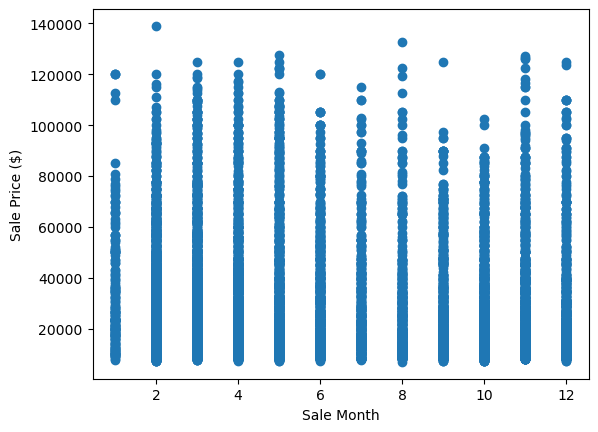

In [13]:
# View 10,000 samples SalePrice against saleMonth
fig, ax = plt.subplots()
ax.scatter(x=df_tmp["saleMonth"][:10000], # visualize the first 10000 values
           y=df_tmp["SalePrice"][:10000])
ax.set_xlabel("Sale Month")
ax.set_ylabel("Sale Price ($)");

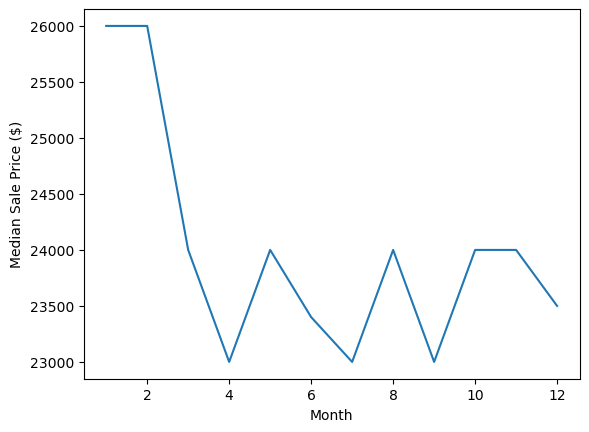

In [14]:
# Group DataFrame by saleMonth and then find the median SalePrice
df_tmp.groupby(["saleMonth"])["SalePrice"].median().plot()
plt.xlabel("Month")
plt.ylabel("Median Sale Price ($)");

#### Inspect values of other columns

In [15]:
# Check the different values of different columns
df_tmp.state.value_counts()[:10]

state
Florida        67320
Texas          53110
California     29761
Washington     16222
Georgia        14633
Maryland       13322
Mississippi    13240
Ohio           12369
Illinois       11540
Colorado       11529
Name: count, dtype: int64

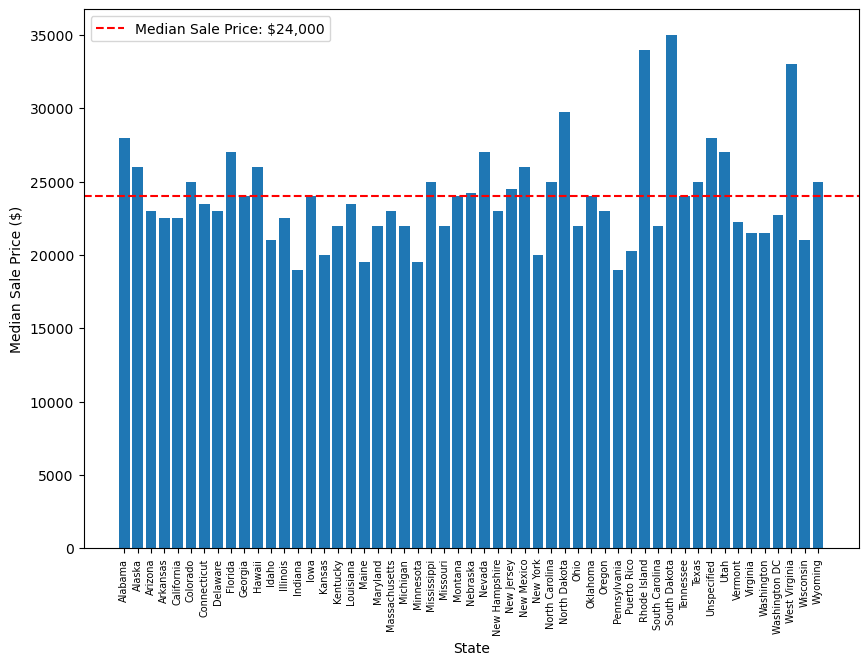

In [16]:
# Group DataFrame by saleMonth and then find the median SalePrice per state as well as across the whole dataset
median_prices_by_state = df_tmp.groupby(["state"])["SalePrice"].median() # this will return a pandas Series rather than a DataFrame
median_sale_price = df_tmp["SalePrice"].median()

# Create a plot comparing median sale price per state to median sale price overall
plt.figure(figsize=(10, 7))
plt.bar(x=median_prices_by_state.index, # Because we're working with a Series, we can use the index (state names) as the x values
        height=median_prices_by_state.values)
plt.xlabel("State")
plt.ylabel("Median Sale Price ($)")
plt.xticks(rotation=90, fontsize=7);
plt.axhline(y=median_sale_price,
            color="red",
            linestyle="--",
            label=f"Median Sale Price: ${median_sale_price:,.0f}")
plt.legend();

`Florida` has the most sales and the median sale price is above the overall median of all other states.

## Model Driven Data Exploration 📊🤖

We've performed a small Exploratory Data Analysis (EDA) and enriched the dataset with some datetime attributes. Now, let's try to model it!

#### Why Model So Early? 🤔

We know the evaluation metric we are aiming for: **Root Mean Squared Log Error (RMSLE)**. While we could spend more time doing EDA and discovering more about the data ourselves, we will instead use a machine learning model to assist us in our exploration while simultaneously working towards achieving the best evaluation metric possible.

One of the biggest goals of starting any new machine learning project is to reduce the time between experiments.

#### Choosing a Model 🏗️

Following the Scikit-Learn machine learning map and considering that we have over 100,000 examples, we find that either `sklearn.linear_model.SGDRegressor` or `sklearn.ensemble.RandomForestRegressor` could be good candidates for our regression problem.

Since we've worked with the Random Forest algorithm before (in the heart disease classification problem), let's try it out on our regression task.

> **Note:** We're trying just one model here for now. However, you can experiment with many other models from the Scikit-Learn library, as they mostly work with a similar API. There are even libraries such as **LazyPredict** that will try multiple models simultaneously and return a table with the results.

Now, let's implement the Random Forest model and evaluate its performance! 🚀

In [17]:
# Check for missing values and different datatypes
df_tmp.info();

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-null   o

In [18]:
# Find missing values in the head of our DataFrame
df_tmp.head().isna()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayofweek,saleDayofyear
205615,False,False,False,False,False,False,False,True,True,False,...,False,False,False,True,True,False,False,False,False,False
274835,False,False,False,False,False,False,False,True,True,False,...,True,True,True,False,False,False,False,False,False,False
141296,False,False,False,False,False,False,False,True,True,False,...,False,False,False,True,True,False,False,False,False,False
212552,False,False,False,False,False,False,False,True,True,False,...,True,True,True,False,False,False,False,False,False,False
62755,False,False,False,False,False,False,False,True,True,False,...,False,False,False,True,True,False,False,False,False,False


In [19]:
# Check for total missing values per column
df_tmp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

In [20]:
# Get the dtype of a given column
df_tmp["UsageBand"].dtype, df_tmp["UsageBand"].dtype.name

(dtype('O'), 'object')

In [21]:
# Check whether a column is an object
pd.api.types.is_object_dtype(df_tmp["UsageBand"])

True

In [22]:
# Check whether a column is a string
pd.api.types.is_string_dtype(df_tmp["state"])

True

In [23]:
# Print column names and example content of columns which contain strings
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        # Check datatype of target column
        column_datatype = df_tmp[label].dtype.name

        # Get random sample from column values
        example_value = content.sample(1).values

        # Infer random sample datatype
        example_value_dtype = pd.api.types.infer_dtype(example_value)
        print(f"Column name: {label} | Column dtype: {column_datatype} | Example value: {example_value} | Example value dtype: {example_value_dtype}")

Column name: fiModelDesc | Column dtype: object | Example value: ['TB070'] | Example value dtype: string
Column name: fiBaseModel | Column dtype: object | Example value: ['320'] | Example value dtype: string
Column name: fiProductClassDesc | Column dtype: object | Example value: ['Wheel Loader - 150.0 to 175.0 Horsepower'] | Example value dtype: string
Column name: state | Column dtype: object | Example value: ['Wisconsin'] | Example value dtype: string
Column name: ProductGroup | Column dtype: object | Example value: ['TTT'] | Example value dtype: string
Column name: ProductGroupDesc | Column dtype: object | Example value: ['Wheel Loader'] | Example value dtype: string


In [24]:
# Start a count of how many object type columns there are
number_of_object_type_columns = 0

for label, content in df_tmp.items():
    # Check to see if column is of object type (this will include the string columns)
    if pd.api.types.is_object_dtype(content):
        # Check datatype of target column
        column_datatype = df_tmp[label].dtype.name

        # Get random sample from column values
        example_value = content.sample(1).values

        # Infer random sample datatype
        example_value_dtype = pd.api.types.infer_dtype(example_value)
        print(f"Column name: {label} | Column dtype: {column_datatype} | Example value: {example_value} | Example value dtype: {example_value_dtype}")

        number_of_object_type_columns += 1

print(f"\n[INFO] Total number of object type columns: {number_of_object_type_columns}")

Column name: UsageBand | Column dtype: object | Example value: [nan] | Example value dtype: empty
Column name: fiModelDesc | Column dtype: object | Example value: ['772D'] | Example value dtype: string
Column name: fiBaseModel | Column dtype: object | Example value: ['310'] | Example value dtype: string
Column name: fiSecondaryDesc | Column dtype: object | Example value: ['C'] | Example value dtype: string
Column name: fiModelSeries | Column dtype: object | Example value: [nan] | Example value dtype: empty
Column name: fiModelDescriptor | Column dtype: object | Example value: [nan] | Example value dtype: empty
Column name: ProductSize | Column dtype: object | Example value: [nan] | Example value dtype: empty
Column name: fiProductClassDesc | Column dtype: object | Example value: ['Track Type Tractor, Dozer - 105.0 to 130.0 Horsepower'] | Example value dtype: string
Column name: state | Column dtype: object | Example value: ['Texas'] | Example value dtype: string
Column name: ProductGro

#### Converting strings to categories with pandas

In [25]:
# This will turn all of the object columns into category values
for label, content in df_tmp.items():
    if pd.api.types.is_object_dtype(content):
        df_tmp[label] = df_tmp[label].astype("category")

In [26]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor         748

In [27]:
# Check the datatype of a single column
df_tmp.state.dtype

CategoricalDtype(categories=['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
                  'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
                  'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
                  'Kentucky', 'Louisiana', 'Maine', 'Maryland',
                  'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
                  'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
                  'New Jersey', 'New Mexico', 'New York', 'North Carolina',
                  'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
                  'Puerto Rico', 'Rhode Island', 'South Carolina',
                  'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah',
                  'Vermont', 'Virginia', 'Washington', 'Washington DC',
                  'West Virginia', 'Wisconsin', 'Wyoming'],
, ordered=False, categories_dtype=object)

In [28]:
# Get the category names of a given column
df_tmp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [29]:
# Inspect the category codes
df_tmp.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

In [30]:
# Get example string using category number
target_state_cat_number = 43
target_state_cat_value = df_tmp.state.cat.categories[target_state_cat_number]
print(f"[INFO] Target state category number {target_state_cat_number} maps to: {target_state_cat_value}")

[INFO] Target state category number 43 maps to: Texas


Saving our preprocessed data

In [31]:
# Save preprocessed data to file
df_tmp.to_csv('data/bluebook-for-bulldozers/TrainAndValid_object_values_as_categories.csv', index=False)

In [32]:
# Import preprocessed data to file
df_tmp = pd.read_csv('data/bluebook-for-bulldozers/TrainAndValid_object_values_as_categories.csv',
                     low_memory=False)

df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayofweek,saleDayofyear
0,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,TD20,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
1,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,A66,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
2,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,D7G,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,1,31
3,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,A62,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
4,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,D3B,...,None or Unspecified,PAT,Lever,NaN,NaN,1989,1,31,1,31


In [33]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-null   o

In [34]:
for label, content in df_tmp.items():
    if pd.api.types.is_object_dtype(content):
        # Turn object columns into category datatype
        df_tmp[label] = df_tmp[label].astype("category")

In [35]:
!pip install pyarrow fastparquet

In [36]:
import pyarrow
import fastparquet

print("pyarrow version:", pyarrow.__version__)
print("fastparquet version:", fastparquet.__version__)

pyarrow version: 19.0.1
fastparquet version: 2024.11.0


In [37]:
# To save to parquet format requires pyarrow or fastparquet (or both)
# Can install via `pip install pyarrow fastparquet`
df_tmp.to_parquet(path="data/bluebook-for-bulldozers/TrainAndValid_object_values_as_categories.parquet",
                  engine="auto") # "auto" will automatically use pyarrow or fastparquet, defaulting to pyarrow first

In [38]:
# Read in df_tmp from parquet format
df_tmp = pd.read_parquet(path="data/bluebook-for-bulldozers/TrainAndValid_object_values_as_categories.parquet",
                         engine="auto")

# Using parquet format, datatypes are preserved
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor         748

Finding and filling missing values

In [39]:
# Check missing values
df_tmp.isna().sum().sort_values(ascending=False)[:20]

Blade_Width          386715
Enclosure_Type       386715
Engine_Horsepower    386715
Tip_Control          386715
Pushblock            386715
Blade_Extension      386715
Scarifier            386704
Grouser_Tracks       367823
Hydraulics_Flow      367823
Coupler_System       367724
fiModelSeries        354031
Steering_Controls    341176
Differential_Type    341134
UsageBand            339028
fiModelDescriptor    337882
Backhoe_Mounting     331986
Turbocharged         331602
Stick                331602
Pad_Type             331602
Blade_Type           330823
dtype: int64

Filling missing numerical values

In [40]:
# Find numeric columns
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        # Check datatype of target column
        column_datatype = df_tmp[label].dtype.name

        # Get random sample from column values
        example_value = content.sample(1).values

        # Infer random sample datatype
        example_value_dtype = pd.api.types.infer_dtype(example_value)
        print(f"Column name: {label} | Column dtype: {column_datatype} | Example value: {example_value} | Example value dtype: {example_value_dtype}")

Column name: SalesID | Column dtype: int64 | Example value: [1680541] | Example value dtype: integer
Column name: SalePrice | Column dtype: float64 | Example value: [29000.] | Example value dtype: floating
Column name: MachineID | Column dtype: int64 | Example value: [1477904] | Example value dtype: integer
Column name: ModelID | Column dtype: int64 | Example value: [7944] | Example value dtype: integer
Column name: datasource | Column dtype: int64 | Example value: [132] | Example value dtype: integer
Column name: auctioneerID | Column dtype: float64 | Example value: [1.] | Example value dtype: floating
Column name: YearMade | Column dtype: int64 | Example value: [2002] | Example value dtype: integer
Column name: MachineHoursCurrentMeter | Column dtype: float64 | Example value: [1971.] | Example value dtype: floating
Column name: saleYear | Column dtype: int64 | Example value: [2005] | Example value dtype: integer
Column name: saleMonth | Column dtype: int64 | Example value: [2] | Exam

In [41]:
# Check for which numeric columns have null values
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(f"Column name: {label} | Has missing values: {True}")
        else:
            print(f"Column name: {label} | Has missing values: {False}")

Column name: SalesID | Has missing values: False
Column name: SalePrice | Has missing values: False
Column name: MachineID | Has missing values: False
Column name: ModelID | Has missing values: False
Column name: datasource | Has missing values: False
Column name: auctioneerID | Has missing values: True
Column name: YearMade | Has missing values: False
Column name: MachineHoursCurrentMeter | Has missing values: True
Column name: saleYear | Has missing values: False
Column name: saleMonth | Has missing values: False
Column name: saleDay | Has missing values: False
Column name: saleDayofweek | Has missing values: False
Column name: saleDayofyear | Has missing values: False


 Handling missing values

| **Method** | **Pros**  | **Cons** |
|-----|-----|-----|
| **Fill with mean of column** | - Easy to calculate/implement <br> - Retains overall data distribution | - Averages out variation <br> - Affected by outliers (e.g. if one value is much higher/lower than others) |
| **Fill with median of column** | - Easy to calculate/implement <br> - Robust to outliers <br> - Preserves center of data  | - Ignores data distribution shape |
| **Fill with mode of column** | - Easy to calculate/implement <br> - More useful for categorical-like data | - May not make sense for continuous/numerical data  |
| **Fill with 0 (or another constant)** | - Simple to implement <br> - Useful in certain contexts like counts  | - Introduces bias (e.g. if 0 was a value that meant something) <br> - Skews data (e.g. if many missing values, replacing all with 0 makes it look like that's the most common value)  |
| **Forward/Backward fill (use previous/future values to fill future/previous values)**  | - Maintains temporal continuity (for time series) | - Assumes data is continuous, which may not be valid |
| **Use a calculation from other columns** | - Takes existing information and reinterprets it | - Can result in unlikely outputs if calculations are not continuous |
| **Interpolate  (e.g. like dragging a cell in Excel/Google Sheets)** | - Captures trends <br> - Suitable for ordered data | - Can introduce errors <br> - May assume linearity (data continues in a straight line) |
| **Drop missing values** | - Ensures complete data (only use samples with all information) <br> - Useful for small datasets | - Can result in data loss (e.g. if many missing values are scattered across columns, data size can be dramatically reduced) <br> - Reduces dataset size  |

In [42]:
# Fill missing numeric values with the median of the target column
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():

            # Add a binary column which tells if the data was missing our not
            df_tmp[label+"_is_missing"] = pd.isnull(content).astype(int) # this will add a 0 or 1 value to rows with missing values (e.g. 0 = not missing, 1 = missing)

            # Fill missing numeric values with median since it's more robust than the mean
            df_tmp[label] = content.fillna(content.median())

In [43]:
# Show rows where MachineHoursCurrentMeter_is_missing == 1
df_tmp[df_tmp["MachineHoursCurrentMeter_is_missing"] == 1].sample(5)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayofweek,saleDayofyear,auctioneerID_is_missing,MachineHoursCurrentMeter_is_missing
139987,1519630,35000.0,1275945,1561,132,2.0,1992,0.0,NaN,D4HIILGP,...,None or Unspecified,NaN,NaN,2003,2,2,6,33,0,1
26658,1521934,33000.0,1418438,4199,132,2.0,1989,0.0,NaN,E110B,...,NaN,NaN,NaN,1994,2,10,3,41,0,1
185559,1393233,61000.0,880818,4148,132,1.0,1983,0.0,NaN,D8L,...,None or Unspecified,NaN,NaN,2005,6,23,3,174,0,1
195826,1543222,37000.0,1397713,3460,132,2.0,2001,0.0,NaN,307C,...,NaN,NaN,NaN,2006,2,5,6,36,0,1
206501,1550845,53000.0,1466811,1130,132,1.0,2001,0.0,NaN,315CL,...,NaN,NaN,NaN,2006,6,30,4,181,0,1


In [44]:
# Check for which numeric columns have null values
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(f"Column name: {label} | Has missing values: {True}")
        else:
            print(f"Column name: {label} | Has missing values: {False}")

Column name: SalesID | Has missing values: False
Column name: SalePrice | Has missing values: False
Column name: MachineID | Has missing values: False
Column name: ModelID | Has missing values: False
Column name: datasource | Has missing values: False
Column name: auctioneerID | Has missing values: False
Column name: YearMade | Has missing values: False
Column name: MachineHoursCurrentMeter | Has missing values: False
Column name: saleYear | Has missing values: False
Column name: saleMonth | Has missing values: False
Column name: saleDay | Has missing values: False
Column name: saleDayofweek | Has missing values: False
Column name: saleDayofyear | Has missing values: False
Column name: auctioneerID_is_missing | Has missing values: False
Column name: MachineHoursCurrentMeter_is_missing | Has missing values: False


In [45]:
# Check to see how many examples in the auctioneerID were missing
df_tmp.auctioneerID_is_missing.value_counts()

auctioneerID_is_missing
0    392562
1     20136
Name: count, dtype: int64

In [46]:
# Check columns which aren't numeric
print(f"[INFO] Columns which are not numeric:")
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(f"Column name: {label} | Column dtype: {df_tmp[label].dtype.name}")

[INFO] Columns which are not numeric:
Column name: UsageBand | Column dtype: category
Column name: fiModelDesc | Column dtype: category
Column name: fiBaseModel | Column dtype: category
Column name: fiSecondaryDesc | Column dtype: category
Column name: fiModelSeries | Column dtype: category
Column name: fiModelDescriptor | Column dtype: category
Column name: ProductSize | Column dtype: category
Column name: fiProductClassDesc | Column dtype: category
Column name: state | Column dtype: category
Column name: ProductGroup | Column dtype: category
Column name: ProductGroupDesc | Column dtype: category
Column name: Drive_System | Column dtype: category
Column name: Enclosure | Column dtype: category
Column name: Forks | Column dtype: category
Column name: Pad_Type | Column dtype: category
Column name: Ride_Control | Column dtype: category
Column name: Stick | Column dtype: category
Column name: Transmission | Column dtype: category
Column name: Turbocharged | Column dtype: category
Column n

In [47]:
# 1. Create a dictionary to store column to category values (e.g. we turn our category types into numbers but we keep a record so we can go back)
column_to_category_dict = {}

# 2. Turn categorical variables into numbers
for label, content in df_tmp.items():

    # 3. Check columns which *aren't* numeric
    if not pd.api.types.is_numeric_dtype(content):

        # 4. Add binary column to inidicate whether sample had missing value
        df_tmp[label+"_is_missing"] = pd.isnull(content).astype(int)

        # 5. Ensure content is categorical and get its category codes
        content_categories = pd.Categorical(content)
        content_category_codes = content_categories.codes + 1 # prevents -1 (the default for NaN values) from being used for missing values (we'll treat missing values as 0)

        # 6. Add column key to dictionary with code: category mapping per column
        column_to_category_dict[label] = dict(zip(content_category_codes, content_categories))

        # 7. Set the column to the numerical values (the category code value)
        df_tmp[label] = content_category_codes

In [48]:
df_tmp.sample(5)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
349165,4360000,27500.0,2273048,5273,172,1.0,1000,4790.0,2,2143,...,1,1,1,1,1,0,0,0,1,1
306826,2250912,52500.0,102923,3357,136,1.0,1994,0.0,0,83,...,1,1,1,1,1,1,1,1,1,1
368292,2661118,9500.0,1942455,4990,149,4.0,1995,0.0,0,1029,...,1,1,1,1,1,1,1,1,1,1
52955,1301404,18000.0,1509208,4123,132,7.0,1973,0.0,0,2298,...,1,1,1,1,1,0,0,0,1,1
105210,1628118,18500.0,1214700,4603,132,2.0,1996,0.0,0,497,...,1,1,1,1,1,1,1,1,1,1


In [49]:
# Check the UsageBand (measure of bulldozer usage)
for key, value in sorted(column_to_category_dict["UsageBand"].items()): # note: calling sorted() on dictionary.items() sorts the dictionary by keys
    print(f"{key} -> {value}")

0 -> nan
1 -> High
2 -> Low
3 -> Medium


In [50]:
# Check the first 10 state column values
for key, value in sorted(column_to_category_dict["state"].items())[:10]:
    print(f"{key} -> {value}")

1 -> Alabama
2 -> Alaska
3 -> Arizona
4 -> Arkansas
5 -> California
6 -> Colorado
7 -> Connecticut
8 -> Delaware
9 -> Florida
10 -> Georgia


In [51]:
# Check total number of missing values
total_missing_values = df_tmp.isna().sum().sum()

if total_missing_values == 0:
    print(f"[INFO] Total missing values: {total_missing_values} - Woohoo! Let's build a model!")
else:
    print(f"[INFO] Uh ohh... total missing values: {total_missing_values} - Perhaps we might have to retrace our steps to fill the values?")

[INFO] Total missing values: 0 - Woohoo! Let's build a model!


Saving our preprocessed data again

In [52]:
# Save preprocessed data with object values as categories as well as missing values filled
df_tmp.to_parquet(path="data/bluebook-for-bulldozers/TrainAndValid_object_values_as_categories_and_missing_values_filled.parquet",
                  engine="auto")

In [53]:
# Read in preprocessed dataset
df_tmp = pd.read_parquet(path="data/bluebook-for-bulldozers/TrainAndValid_object_values_as_categories_and_missing_values_filled.parquet",
                         engine="auto")

In [54]:
# Check total number of missing values
total_missing_values = df_tmp.isna().sum().sum()

if total_missing_values == 0:
    print(f"[INFO] Total missing values: {total_missing_values} - Woohoo! Let's build a model!")
else:
    print(f"[INFO] Uh ohh... total missing values: {total_missing_values} - Perhaps we might have to retrace our steps to fill the values?")

[INFO] Total missing values: 0 - Woohoo! Let's build a model!


## Fitting a Machine Learning Model to Our Preprocessed Data 🤖🔍

Now that all of our data is numeric and there are no missing values, we should be able to fit a machine learning model to it!

Let's reinstantiate our trusty [`sklearn.ensemble.RandomForestRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) model.

#### Working with a Smaller Sample 📉

Since our dataset has a substantial amount of rows (~400k+), let's first ensure that the model will work on a smaller sample of around 1000 rows.

> **Note:** It's common practice in machine learning to test your experiments on smaller-scale problems (e.g., smaller amounts of data) before scaling them up to the full dataset. This approach allows you to try various experiments with faster runtimes, helping you identify what doesn't work before investing more time in what does.

#### Defining Features and Labels 🎯

- Our `X` values (features) will be every column except the `SalePrice` column.
- Our `y` values (labels) will be the entirety of the `SalePrice` column.

#### Timing the Experiment ⏱️

We'll time how long our smaller experiment takes using the magic function `%%time` and placing it at the top of the notebook cell.

> **Note:** You can find out more about the `%%time` magic command by typing `%%time?` (note the question mark at the end) in a notebook cell.

Now, let's fit the model to our preprocessed data! 🚀

In [55]:
%%time
from sklearn.ensemble import RandomForestRegressor

# Sample 1000 samples with random state 42 for reproducibility
df_tmp_sample_1k = df_tmp.sample(n=1000, random_state=42)

# Instantiate a model
model = RandomForestRegressor(n_jobs=-1) # use -1 to utilise all available processors

# Create features and labels
X_sample_1k = df_tmp_sample_1k.drop("SalePrice", axis=1) # use all columns except SalePrice as X values
y_sample_1k = df_tmp_sample_1k["SalePrice"] # use SalePrice as y values (target variable)

# Fit the model to the sample data
model.fit(X=X_sample_1k,
          y=y_sample_1k)

CPU times: total: 5.97 s
Wall time: 2.57 s


RandomForestRegressor(n_jobs=-1)

In [56]:
# Evaluate the model
model_sample_1k_score = model.score(X=X_sample_1k,
                                    y=y_sample_1k)

print(f"[INFO] Model score on {len(df_tmp_sample_1k)} samples: {model_sample_1k_score}")

[INFO] Model score on 1000 samples: 0.9569083833574239


In [57]:
%%time

# Instantiate model
model = RandomForestRegressor(n_jobs=-1) # note: this could take quite a while depending on your machine (it took ~1.5 minutes on my MacBook Pro M1 Pro with 10 cores)

# Create features and labels with entire dataset
X_all = df_tmp.drop("SalePrice", axis=1)
y_all = df_tmp["SalePrice"]

# Fit the model
model.fit(X=X_all,
          y=y_all)

CPU times: total: 35min 38s
Wall time: 4min 46s


RandomForestRegressor(n_jobs=-1)

In [58]:
# Evaluate the model
model_sample_all_score = model.score(X=X_all,
                                     y=y_all)

print(f"[INFO] Model score on {len(df_tmp)} samples: {model_sample_all_score}")

[INFO] Model score on 412698 samples: 0.9876047557813677


**Data leakage** (data from the training set leaking into the validation/testing sets).

Right back at the start we imported a file called `TrainAndValid.csv`, this file contains both the training and validation data.

And while we preprocessed it to make sure there were no missing values and the samples were all numeric, we never split the data into separate training and validation splits.


#### Splitting data into the right train/validation sets

In [60]:
# Import train samples (making sure to parse dates and then sort by them)
train_df = pd.read_csv(filepath_or_buffer="data/bluebook-for-bulldozers/Train.csv",
                       parse_dates=["saledate"],
                       low_memory=False).sort_values(by="saledate", ascending=True)

# Import validation samples (making sure to parse dates and then sort by them)
valid_df = pd.read_csv(filepath_or_buffer="data/bluebook-for-bulldozers/Valid.csv",
                       parse_dates=["saledate"])

# The ValidSolution.csv contains the SalePrice values for the samples in Valid.csv
valid_solution = pd.read_csv(filepath_or_buffer="data/bluebook-for-bulldozers/ValidSolution.csv")

# Map valid_solution to valid_df
valid_df["SalePrice"] = valid_df["SalesID"].map(valid_solution.set_index("SalesID")["SalePrice"])

# Make sure valid_df is sorted by saledate still
valid_df = valid_df.sort_values("saledate", ascending=True).reset_index(drop=True)

# How many samples are in each DataFrame?
print(f"[INFO] Number of samples in training DataFrame: {len(train_df)}")
print(f"[INFO] Number of samples in validation DataFrame: {len(valid_df)}")

[INFO] Number of samples in training DataFrame: 401125
[INFO] Number of samples in validation DataFrame: 11573


In [61]:
# Let's check out the training DataFrame
train_df.sample(5)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
61620,1325341,12500,1423454,4089,132,2.0,1986,NaN,NaN,1999-12-18,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,NaN,NaN
89941,1397228,23500,1160075,1530,132,22.0,1993,NaN,NaN,2004-10-14,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,NaN,NaN
228162,1718826,32000,1119816,2153,132,3.0,2000,NaN,NaN,2010-08-12,...,None or Unspecified,"10' 6""",None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
186803,1622376,9700,1159991,4602,132,9.0,1990,NaN,NaN,2001-11-07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
335734,2349021,26000,1656310,4604,136,NaN,2000,0.0,NaN,2007-06-27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
# And how about the validation DataFrame?
valid_df.sample(5)

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,SalePrice
1174,6298349,1920875,5162,149,2,2006,NaN,NaN,2012-01-28,214E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24000.0
8854,6302555,1805113,5274,149,8,1000,NaN,NaN,2012-03-28,D41P,...,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,NaN,NaN,18000.0
136,6315338,1713919,26356,149,99,2005,24.0,Low,2012-01-18,DC85LGP,...,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,NaN,NaN,33300.0
2631,4283329,2277816,7464,172,1,1974,0.0,NaN,2012-02-12,D5,...,NaN,NaN,NaN,NaN,None or Unspecified,Straight,Differential Steer,NaN,NaN,11000.0
1755,4246003,2295262,22265,172,1,1000,0.0,NaN,2012-02-07,450C,...,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN,9500.0


In [63]:
# Make a function to add date columns
def add_datetime_features_to_df(df, date_column="saledate"):
    # Add datetime parameters for saledate
    df["saleYear"] = df[date_column].dt.year
    df["saleMonth"] = df[date_column].dt.month
    df["saleDay"] = df[date_column].dt.day
    df["saleDayofweek"] = df[date_column].dt.dayofweek
    df["saleDayofyear"] = df[date_column].dt.dayofyear

    # Drop original saledate column
    df.drop("saledate", axis=1, inplace=True)

    return df

train_df = add_datetime_features_to_df(df=train_df)
valid_df = add_datetime_features_to_df(df=valid_df)

In [64]:
# Split training data into features and labels
X_train = train_df.drop("SalePrice", axis=1)
y_train = train_df["SalePrice"]

# Split validation data into features and labels
X_valid = valid_df.drop("SalePrice", axis=1)
y_valid = valid_df["SalePrice"]

# Create a model
model = RandomForestRegressor(n_jobs=-1)

In [65]:
# Display the last 5 columns (the recently added datetime breakdowns)
train_df.iloc[:, -5:].sample(5)

,saleYear,saleMonth,saleDay,saleDayofweek,saleDayofyear
236760,2003,9,13,5,256
368796,2010,8,18,2,230
200691,2010,6,5,5,156
132816,2003,5,5,0,125
351257,2008,3,12,2,72


#### Encoding categorical features as numbers using Scikit-Learn

In [66]:
# Define numerical and categorical features
numerical_features = [label for label, content in X_train.items() if pd.api.types.is_numeric_dtype(content)]
categorical_features = [label for label, content in X_train.items() if not pd.api.types.is_numeric_dtype(content)]

print(f"[INFO] Numeric features: {numerical_features}")
print(f"[INFO] Categorical features: {categorical_features[:10]}...")

[INFO] Numeric features: ['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'saleYear', 'saleMonth', 'saleDay', 'saleDayofweek', 'saleDayofyear']
[INFO] Categorical features: ['UsageBand', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries', 'fiModelDescriptor', 'ProductSize', 'fiProductClassDesc', 'state', 'ProductGroup']...


In [67]:
from sklearn.preprocessing import OrdinalEncoder

# 1. Create an ordinal encoder (turns category items into numeric representation)
ordinal_encoder = OrdinalEncoder(categories="auto",
                                 handle_unknown="use_encoded_value",
                                 unknown_value=np.nan,
                                 encoded_missing_value=np.nan) # treat unknown categories as np.nan (or None)

# 2. Fit and transform the categorical columns of X_train
X_train_preprocessed = X_train.copy() # make copies of the oringal DataFrames so we can keep the original values in tact and view them later
X_train_preprocessed[categorical_features] = ordinal_encoder.fit_transform(X_train_preprocessed[categorical_features].astype(str)) # OrdinalEncoder expects all values as the same type (e.g. string or numeric only)

# 3. Transform the categorical columns of X_valid 
X_valid_preprocessed = X_valid.copy()
X_valid_preprocessed[categorical_features] = ordinal_encoder.transform(X_valid_preprocessed[categorical_features].astype(str)) # only use `transform` on the validation data

In [68]:
X_train.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayofweek,saleDayofyear
205615,1646770,1126363,8434,132,18.0,1974,NaN,NaN,TD20,TD20,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
92803,1404019,1169900,7110,132,99.0,1986,NaN,NaN,416,416,...,NaN,NaN,NaN,NaN,NaN,1989,1,31,1,31
98346,1415646,1262088,3357,132,99.0,1975,NaN,NaN,12G,12,...,NaN,NaN,NaN,NaN,NaN,1989,1,31,1,31
169297,1596358,1433229,8247,132,99.0,1978,NaN,NaN,644,644,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
274835,1821514,1194089,10150,132,99.0,1980,NaN,NaN,A66,A66,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31


In [69]:
X_train[categorical_features].isna().sum().sort_values(ascending=False)[:10]

Tip_Control          375906
Enclosure_Type       375906
Engine_Horsepower    375906
Blade_Extension      375906
Blade_Width          375906
Pushblock            375906
Scarifier            375895
Grouser_Tracks       357763
Hydraulics_Flow      357763
Coupler_System       357667
dtype: int64

In [70]:
X_train_preprocessed[categorical_features].isna().sum().sort_values(ascending=False)[:10]

UsageBand             0
fiModelDesc           0
fiBaseModel           0
fiSecondaryDesc       0
fiModelSeries         0
fiModelDescriptor     0
ProductSize           0
fiProductClassDesc    0
state                 0
ProductGroup          0
dtype: int64

In [71]:
# Let's inspect the first three categories
ordinal_encoder.categories_[:3]

[array(['High', 'Low', 'Medium', 'nan'], dtype=object),
 array(['100C', '104', '1066', ..., 'ZX800LC', 'ZX80LCK', 'ZX850H'],
       shape=(4999,), dtype=object),
 array(['10', '100', '104', ..., 'ZX80', 'ZX800', 'ZX850'],
       shape=(1950,), dtype=object)]

In [72]:
# Create a dictionary of dictionaries mapping column names and their variables to their numerical encoding
column_to_category_mapping = {}

for column_name, category_values in zip(categorical_features, ordinal_encoder.categories_):
    int_to_category = {i: category for i, category in enumerate(category_values)}
    column_to_category_mapping[column_name] = int_to_category

# Inspect an example column name to category mapping
column_to_category_mapping["UsageBand"]

{0: 'High', 1: 'Low', 2: 'Medium', 3: 'nan'}

In [73]:

# Create a copy of the preprocessed DataFrame
X_train_unprocessed = X_train_preprocessed[categorical_features].copy()

# This will return an array of the original untransformed data
X_train_unprocessed = ordinal_encoder.inverse_transform(X_train_unprocessed)

# Turn back into a DataFrame for viewing pleasure
X_train_unprocessed_df = pd.DataFrame(X_train_unprocessed, columns=categorical_features)

# Check out a sample
X_train_unprocessed_df.sample(5)

,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
256731,Low,6640,6640,nan,nan,nan,nan,Skid Steer Loader - 2201.0 to 2701.0 Lb Operat...,Utah,SSL,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
130657,nan,12E,12,E,nan,nan,nan,Motorgrader - 45.0 to 130.0 Horsepower,Texas,MG,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
361042,nan,580MII,580,M,II,nan,nan,Backhoe Loader - 14.0 to 15.0 Ft Standard Digg...,Texas,BL,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
81750,nan,EX60URG,EX60,URG,nan,nan,Mini,"Hydraulic Excavator, Track - 6.0 to 8.0 Metric...",California,TEX,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,nan,nan,nan,nan,nan
397593,Medium,D4KXL,D4,K,nan,XL,nan,"Track Type Tractor, Dozer - 75.0 to 85.0 Horse...",Texas,TTT,...,nan,nan,nan,nan,nan,None or Unspecified,PAT,Differential Steer,nan,nan


In [74]:
%%time

# Instantiate a Random Forest Regression model
model = RandomForestRegressor(n_jobs=-1)

# Fit the model to the preprocessed training data
model.fit(X=X_train_preprocessed,
          y=y_train)

CPU times: total: 29min 16s
Wall time: 3min 52s


RandomForestRegressor(n_jobs=-1)

In [75]:
%%time

# Check model performance on the validation set
model.score(X=X_valid_preprocessed,
            y=y_valid)

CPU times: total: 1.2 s
Wall time: 190 ms


0.8713653269208202

In [76]:
%%time

# Check model performance on the training set
model.score(X=X_train_preprocessed,
            y=y_train)

CPU times: total: 39.8 s
Wall time: 5.61 s


0.9872761502824867

#### Building an evaluation function


$$ \text{RMSLE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} \left( \log(1 + \hat{y}_i) - \log(1 + y_i) \right)^2} $$

Where:

* $ \hat{y}_i $ is the predicted value,  
* $ y_i $ is the actual value,  
* $ n $ is the number of observations.

In [77]:
# Create evaluation function (the competition uses Root Mean Square Log Error)
from sklearn.metrics import mean_absolute_error, root_mean_squared_log_error

# Create function to evaluate our model
def show_scores(model, 
                train_features=X_train_preprocessed,
                train_labels=y_train,
                valid_features=X_valid_preprocessed,
                valid_labels=y_valid):
    
    # Make predictions on train and validation features
    train_preds = model.predict(X=train_features)
    val_preds = model.predict(X=valid_features)

    # Create a scores dictionary of different evaluation metrics
    scores = {"Training MAE": mean_absolute_error(y_true=train_labels, 
                                                  y_pred=train_preds),
              "Valid MAE": mean_absolute_error(y_true=valid_labels, 
                                               y_pred=val_preds),
              "Training RMSLE": root_mean_squared_log_error(y_true=train_labels, 
                                                            y_pred=train_preds),
              "Valid RMSLE": root_mean_squared_log_error(y_true=valid_labels, 
                                                         y_pred=val_preds),
              "Training R^2": model.score(X=train_features, 
                                          y=train_labels),
              "Valid R^2": model.score(X=valid_features, 
                                       y=valid_labels)}
    return scores

In [78]:
# Try our model scoring function out
model_scores = show_scores(model=model)
model_scores

{'Training MAE': 1597.0084190464322,
 'Valid MAE': 6152.288618047754,
 'Training RMSLE': 0.0855547445116139,
 'Valid RMSLE': 0.25655909248182346,
 'Training R^2': 0.9872761502824867,
 'Valid R^2': 0.8713653269208202}

## 5. Tuning our model's hyperparameters

Hyperparameters are the settings we can change on our model.

And tuning hyperparameters on a given model can often alter its performance on a given dataset.

Ideally, changing hyperparameters would lead to better results.

However, it's often hard to know what hyperparameter changes would improve a model ahead of time.

In [79]:
%%time

# Change max samples in RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, # this is the default
                              n_jobs=-1,
                              max_samples=10000) # each estimator sees max_samples (the default is to see all available samples)

# Cutting down the max number of samples each tree can see improves training time
model.fit(X_train_preprocessed, 
          y_train)

CPU times: total: 1min 6s
Wall time: 9.55 s


RandomForestRegressor(max_samples=10000, n_jobs=-1)

In [80]:
# Get evaluation metrics from reduced sample model
base_model_scores = show_scores(model=model)
base_model_scores

{'Training MAE': 5600.944798238286,
 'Valid MAE': 7162.181735073014,
 'Training RMSLE': 0.2603562924754315,
 'Valid RMSLE': 0.2947910382103256,
 'Training R^2': 0.8584384290550433,
 'Valid R^2': 0.830105772579609}

### Hyperparameter tuning with RandomizedSearchCV

In [81]:
%%time

from sklearn.model_selection import RandomizedSearchCV

# 1. Define a dictionary with different values for RandomForestRegressor hyperparameters
# See documatation for potential different values - https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html 
rf_grid = {"n_estimators": np.arange(10, 200, 10),
           "max_depth": [None, 10, 20],
           "min_samples_split": np.arange(2, 10, 1), # min_samples_split must be an int in the range [2, inf) or a float in the range (0.0, 1.0]
           "min_samples_leaf": np.arange(1, 10, 1),
           "max_features": [0.5, 1.0, "sqrt"], # Note: "max_features='auto'" is equivalent to "max_features=1.0", as of Scikit-Learn version 1.1
           "max_samples": [10000]}

# 2. Setup instance of RandomizedSearchCV to explore different parameters 
rs_model = RandomizedSearchCV(estimator=RandomForestRegressor(), # can pass new model instance directly, all settings will be taken from the rf_grid
                              param_distributions=rf_grid,
                              n_iter=20,
                            #   scoring="neg_root_mean_squared_log_error", # want to optimize for RMSLE, though sometimes optimizing for the default metric (R^2) can lead to just as good results all round
                              cv=3,
                              verbose=3) # control how much output gets produced, higher number = more output

# 3. Fit the model using a series of different hyperparameter values
rs_model.fit(X=X_train_preprocessed, 
             y=y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV 1/3] END max_depth=20, max_features=sqrt, max_samples=10000, min_samples_leaf=5, min_samples_split=9, n_estimators=130;, score=0.526 total time=  13.0s
[CV 2/3] END max_depth=20, max_features=sqrt, max_samples=10000, min_samples_leaf=5, min_samples_split=9, n_estimators=130;, score=0.717 total time=  13.4s
[CV 3/3] END max_depth=20, max_features=sqrt, max_samples=10000, min_samples_leaf=5, min_samples_split=9, n_estimators=130;, score=0.644 total time=  12.2s
[CV 1/3] END max_depth=20, max_features=0.5, max_samples=10000, min_samples_leaf=6, min_samples_split=3, n_estimators=90;, score=0.540 total time=  20.2s
[CV 2/3] END max_depth=20, max_features=0.5, max_samples=10000, min_samples_leaf=6, min_samples_split=3, n_estimators=90;, score=0.753 total time=  20.3s
[CV 3/3] END max_depth=20, max_features=0.5, max_samples=10000, min_samples_leaf=6, min_samples_split=3, n_estimators=90;, score=0.637 total time=  19.4s
[CV 1/3] 

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=20,
                   param_distributions={'max_depth': [None, 10, 20],
                                        'max_features': [0.5, 1.0, 'sqrt'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190])},
                   verbose=3)

In [82]:
# Find the best parameters from RandomizedSearchCV
rs_model.best_params_

{'n_estimators': np.int64(80),
 'min_samples_split': np.int64(2),
 'min_samples_leaf': np.int64(1),
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': None}

In [83]:
%%time

# Create a model with best found hyperparameters 
# Note: There may be better values out there with longer searches but these are 
# the best I found with a ~2 hour search. A good challenge would be to see if you 
# can find better values.
ideal_model = RandomForestRegressor(n_estimators=90,
                                    max_depth=None,
                                    min_samples_leaf=1,
                                    min_samples_split=5,
                                    max_features=0.5,
                                    n_jobs=-1,
                                    max_samples=None)

# Fit a model to the preprocessed data
ideal_model.fit(X=X_train_preprocessed, 
                y=y_train)

CPU times: total: 12min 51s
Wall time: 1min 41s


RandomForestRegressor(max_features=0.5, min_samples_split=5, n_estimators=90,
                      n_jobs=-1)

In [84]:
%%time

# Evaluate ideal model
ideal_model_scores = show_scores(model=ideal_model)
ideal_model_scores

CPU times: total: 1min 5s
Wall time: 9.14 s


{'Training MAE': 1956.4259552227672,
 'Valid MAE': 5956.6845555633045,
 'Training RMSLE': 0.10216188236769073,
 'Valid RMSLE': 0.24685266524739308,
 'Training R^2': 0.9810502364080845,
 'Valid R^2': 0.8807783320765707}

In [85]:
%%time

# Halve the number of estimators
fast_model = RandomForestRegressor(n_estimators=45,
                                   max_depth=None,
                                   min_samples_leaf=1,
                                   min_samples_split=5,
                                   max_features=0.5,
                                   n_jobs=-1,
                                   max_samples=None)

# Fit the faster model to the data
fast_model.fit(X=X_train_preprocessed, 
               y=y_train)

CPU times: total: 6min 28s
Wall time: 51.1 s


RandomForestRegressor(max_features=0.5, min_samples_split=5, n_estimators=45,
                      n_jobs=-1)

In [86]:
%%time

# Get results from the fast model
fast_model_scores = show_scores(model=fast_model)
fast_model_scores

CPU times: total: 32.9 s
Wall time: 4.98 s


{'Training MAE': 1987.6273515712817,
 'Valid MAE': 5989.040116780382,
 'Training RMSLE': 0.10354948957530359,
 'Valid RMSLE': 0.24725095935423513,
 'Training R^2': 0.9802642672556509,
 'Valid R^2': 0.8808078833064444}

In [87]:
# Add names of models to dictionaries
base_model_scores["model_name"] = "default_model"
ideal_model_scores["model_name"] = "ideal_model" 
fast_model_scores["model_name"] = "fast_model" 

# Turn all model score dictionaries into a list
all_model_scores = [base_model_scores,  
                    ideal_model_scores,
                    fast_model_scores]

# Create DataFrame and sort model scores by validation RMSLE
model_comparison_df = pd.DataFrame(all_model_scores).sort_values(by="Valid RMSLE", ascending=False)
model_comparison_df.head()

,Training MAE,Valid MAE,Training RMSLE,Valid RMSLE,Training R^2,Valid R^2,model_name
0,5600.944798,7162.181735,0.260356,0.294791,0.858438,0.830106,default_model
2,1987.627352,5989.040117,0.103549,0.247251,0.980264,0.880808,fast_model
1,1956.425955,5956.684556,0.102162,0.246853,0.981050,0.880778,ideal_model


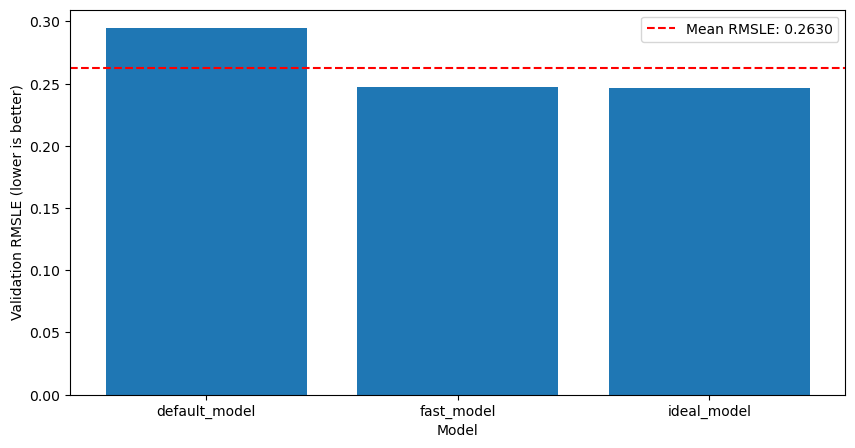

In [88]:
# Get mean RSMLE score of all models
mean_rsmle_score = model_comparison_df["Valid RMSLE"].mean()

# Plot validation RMSLE against each other 
plt.figure(figsize=(10, 5))
plt.bar(x=model_comparison_df["model_name"],
        height=model_comparison_df["Valid RMSLE"].values)
plt.xlabel("Model")
plt.ylabel("Validation RMSLE (lower is better)")
plt.xticks(rotation=0, fontsize=10);
plt.axhline(y=mean_rsmle_score, 
            color="red", 
            linestyle="--", 
            label=f"Mean RMSLE: {mean_rsmle_score:.4f}")
plt.legend();

## 6. Saving our best model to file

In [89]:
import joblib

bulldozer_price_prediction_model_name = "randomforest_regressor_best_RMSLE.pkl"

# Save model to file
joblib.dump(value=ideal_model, 
            filename=bulldozer_price_prediction_model_name)

['randomforest_regressor_best_RMSLE.pkl']

In [90]:
# Load the best model
best_model = joblib.load(filename=bulldozer_price_prediction_model_name)
best_model

RandomForestRegressor(max_features=0.5, min_samples_split=5, n_estimators=90,
                      n_jobs=-1)

In [91]:
# Confirm that the model works
best_model_scores = show_scores(model=best_model)
best_model_scores

{'Training MAE': 1956.4259552227672,
 'Valid MAE': 5956.6845555633045,
 'Training RMSLE': 0.10216188236769072,
 'Valid RMSLE': 0.24685266524739308,
 'Training R^2': 0.9810502364080845,
 'Valid R^2': 0.8807783320765707}

In [92]:
# See if loaded model and pre-saved model results are the same
# Note: these values may be very slightly different depending on how precise your computer stores values.
best_model_scores["Valid RMSLE"] == ideal_model_scores["Valid RMSLE"]

True

In [93]:
# Is the loaded model as good as the non-loaded model?
if np.isclose(a=best_model_scores["Valid RMSLE"], 
              b=ideal_model_scores["Valid RMSLE"],
              atol=1e-4): # Make sure values are within 0.0001 of each other
    print(f"[INFO] Model results are close!")
else:
    print(f"[INFO] Model results aren't close, did something go wrong?")

[INFO] Model results are close!


> **Note:** When saving and loading a model, it is often the case to have very slightly different values at the extremes. For example, the pre-saved model may have an RMSLE of `0.24654150224930685` where as the loaded model may have an RMSLE of `0.24654150224930684` where in this case the values are off by `0.00000000000000001` (a very small number). This is due to the [precision of computing](https://en.wikipedia.org/wiki/Precision_(computer_science)) and the way computers store values, where numbers are exact but can be represented up to a certain amount of precision. This is why we generally compare results with many decimals using `np.isclose` rather than the `==` operator.

## 7. Making predictions on test data

In [95]:
# Load the test data
test_df = pd.read_csv(filepath_or_buffer="data/bluebook-for-bulldozers/Test.csv",
                      parse_dates=["saledate"])
test_df.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [96]:
# Make a function to add date columns
def add_datetime_features_to_df(df, date_column="saledate"):
    # Add datetime parameters for saledate
    df["saleYear"] = df[date_column].dt.year
    df["saleMonth"] = df[date_column].dt.month
    df["saleDay"] = df[date_column].dt.day
    df["saleDayofweek"] = df[date_column].dt.dayofweek
    df["saleDayofyear"] = df[date_column].dt.dayofyear

    # Drop original saledate column
    df.drop("saledate", axis=1, inplace=True)

    return df

# Preprocess test_df to have same columns as train_df (add the datetime features)
test_df = add_datetime_features_to_df(df=test_df)
test_df.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayofweek,saleDayofyear
0,1227829,1006309,3168,121,3,1999,3688.0,Low,580G,580,...,NaN,NaN,NaN,NaN,NaN,2012,5,3,3,124
1,1227844,1022817,7271,121,3,1000,28555.0,High,936,936,...,NaN,NaN,NaN,Standard,Conventional,2012,5,10,3,131
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,EC210BLC,EC210,...,NaN,NaN,NaN,NaN,NaN,2012,5,10,3,131
3,1227848,56204,1269,121,3,2006,8940.0,High,330CL,330,...,NaN,NaN,NaN,NaN,NaN,2012,5,10,3,131
4,1227863,1053887,22312,121,3,2005,2286.0,Low,650K,650,...,None or Unspecified,PAT,None or Unspecified,NaN,NaN,2012,5,10,3,131


In [98]:
# Create a copy of the test DataFrame to keep the original intact
test_df_preprocessed = test_df.copy()

# Transform the categorical features of the test DataFrame into numbers
test_df_preprocessed[categorical_features] = ordinal_encoder.transform(test_df_preprocessed[categorical_features].astype(str))
test_df_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SalesID                   12457 non-null  int64  
 1   MachineID                 12457 non-null  int64  
 2   ModelID                   12457 non-null  int64  
 3   datasource                12457 non-null  int64  
 4   auctioneerID              12457 non-null  int64  
 5   YearMade                  12457 non-null  int64  
 6   MachineHoursCurrentMeter  2129 non-null   float64
 7   UsageBand                 12457 non-null  float64
 8   fiModelDesc               12349 non-null  float64
 9   fiBaseModel               12431 non-null  float64
 10  fiSecondaryDesc           12449 non-null  float64
 11  fiModelSeries             12456 non-null  float64
 12  fiModelDescriptor         12452 non-null  float64
 13  ProductSize               12457 non-null  float64
 14  fiProd

In [99]:
# Make predictions on the preprocessed test data
test_preds = best_model.predict(test_df_preprocessed)

In [100]:
# Check the first 10 test predictions
test_preds[:10]

array([13962.52497194, 32061.39770723, 49038.2319224 , 97123.03671637,
       26775.55856181, 29756.81216931, 26412.3324515 , 19478.47943723,
       18185.99867725, 30505.31305115])

In [101]:
# Check number of test predictions
test_preds.shape, test_df.shape

((12457,), (12457, 56))

In [102]:
# Create DataFrame compatible with Kaggle submission requirements
pred_df = pd.DataFrame()
pred_df["SalesID"] = test_df["SalesID"]
pred_df["SalePrice"] = test_preds
pred_df.sample(5)

,SalesID,SalePrice
8986,6447907,24204.898589
9495,6468400,78570.845759
3500,6264786,21093.190035
7054,6311982,11961.007716
11498,6633375,21064.434524


In [104]:
# Export test dataset predictions to CSV
pred_df.to_csv("data/bluebook-for-bulldozers/predictions.csv",
               index=False)

## 8. Making a prediction on a custom sample


In [105]:
# Get example from test_df
test_df_preprocessed_sample = test_df_preprocessed.sample(n=1, random_state=42)

# Turn back into original format
test_df_unpreprocessed_sample = test_df_preprocessed_sample.copy() 
test_df_unpreprocessed_sample[categorical_features] = ordinal_encoder.inverse_transform(test_df_unpreprocessed_sample[categorical_features])
test_df_unpreprocessed_sample.to_dict(orient="records")

[{'SalesID': 1229148,
  'MachineID': 1042578,
  'ModelID': 9579,
  'datasource': 121,
  'auctioneerID': 3,
  'YearMade': 2004,
  'MachineHoursCurrentMeter': 3290.0,
  'UsageBand': 'Medium',
  'fiModelDesc': 'S250',
  'fiBaseModel': 'S250',
  'fiSecondaryDesc': 'nan',
  'fiModelSeries': 'nan',
  'fiModelDescriptor': 'nan',
  'ProductSize': 'nan',
  'fiProductClassDesc': 'Skid Steer Loader - 2201.0 to 2701.0 Lb Operating Capacity',
  'state': 'Missouri',
  'ProductGroup': 'SSL',
  'ProductGroupDesc': 'Skid Steer Loaders',
  'Drive_System': 'nan',
  'Enclosure': 'EROPS',
  'Forks': 'None or Unspecified',
  'Pad_Type': 'nan',
  'Ride_Control': 'nan',
  'Stick': 'nan',
  'Transmission': 'nan',
  'Turbocharged': 'nan',
  'Blade_Extension': 'nan',
  'Blade_Width': 'nan',
  'Enclosure_Type': 'nan',
  'Engine_Horsepower': 'nan',
  'Hydraulics': 'Auxiliary',
  'Pushblock': 'nan',
  'Ripper': 'nan',
  'Scarifier': 'nan',
  'Tip_Control': 'nan',
  'Tire_Size': 'nan',
  'Coupler': 'Hydraulic',
  'C

In [106]:
# Make a prediction on the preprocessed test sample
best_model.predict(test_df_preprocessed_sample)

array([13326.24037999])

In [107]:
# Create a dictionary of features and values from an internet-based bulldozer advertisement
# See link: https://www.purplewave.com/auction/240606/item/EK8504/2004-Caterpillar-D6R_XL-Crawlers-Crawler_Dozer-Missouri (note: this link is/was valid as of October 2024 but may be invalid in the future)
custom_sample = {
  "SalesID": np.nan,
  "MachineID": 8504,
  "ModelID": np.nan,
  "datasource": np.nan,
  "auctioneerID": np.nan,
  "YearMade": 2004,
  "MachineHoursCurrentMeter": 11770.0,
  "UsageBand": "High",
  "fiModelDesc": "D6RXL",
  "fiBaseModel": "D6",
  "fiSecondaryDesc": "XL",
  "fiModelSeries": np.nan,
  "fiModelDescriptor": np.nan,
  "ProductSize": "Medium",
  "fiProductClassDesc": "Track Type Tractor, Dozer - 130.0 to 160.0 Horsepower",
  "state": "Missouri",
  "ProductGroup": "TTT",
  "ProductGroupDesc": "Track Type Tractors",
  "Drive_System": "No",
  "Enclosure": "EROPS",
  "Forks": "None or Unspecified",
  "Pad_Type": "Grouser",
  "Ride_Control": "None or Unspecified",
  "Stick": "nan",
  "Transmission": "Powershift",
  "Turbocharged": "None or Unspecified",
  "Blade_Extension": "None or Unspecified",
  "Blade_Width": np.nan,
  "Enclosure_Type": np.nan,
  "Engine_Horsepower": np.nan,
  "Hydraulics": np.nan,
  "Pushblock": "None or Unspecified",
  "Ripper": "None or Unspecified",
  "Scarifier": "None or Unspecified",
  "Tip_Control": "Tip",
  "Tire_Size": np.nan,
  "Coupler": np.nan,
  "Coupler_System": np.nan,
  "Grouser_Tracks": "Yes",
  "Hydraulics_Flow": np.nan,
  "Track_Type": "Steel",
  "Undercarriage_Pad_Width": "22 inch",
  "Stick_Length": np.nan,
  "Thumb": np.nan,
  "Pattern_Changer": np.nan,
  "Grouser_Type": "Single",
  "Backhoe_Mounting": "None or Unspecified",
  "Blade_Type": "Semi U",
  "Travel_Controls": np.nan,
  "Differential_Type": np.nan,
  "Steering_Controls": "Command Control",
  "saleYear": 2024,
  "saleMonth": 6,
  "saleDay": 7,
  "saleDayofweek": 5,
  "saleDayofyear": 159
}

In [108]:
# Turn single sample in a DataFrame
custom_sample_df = pd.DataFrame(custom_sample, index=[0])
custom_sample_df.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayofweek,saleDayofyear
0,NaN,8504,NaN,NaN,NaN,2004,11770.0,High,D6RXL,D6,...,None or Unspecified,Semi U,NaN,NaN,Command Control,2024,6,7,5,159


In [109]:
# Transform the categorical features of the custom sample
custom_sample_df[categorical_features] = ordinal_encoder.transform(custom_sample_df[categorical_features].astype(str))
custom_sample_df

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayofweek,saleDayofyear
0,NaN,8504,NaN,NaN,NaN,2004,11770.0,0.0,2308.0,703.0,...,0.0,6.0,7.0,4.0,0.0,2024,6,7,5,159


In [110]:
# Transform the categorical features of the custom sample
custom_sample_df[categorical_features] = ordinal_encoder.transform(custom_sample_df[categorical_features].astype(str))
custom_sample_df

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayofweek,saleDayofyear
0,NaN,8504,NaN,NaN,NaN,2004,11770.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2024,6,7,5,159


In [112]:
# Make a prediction on the preprocessed custom sample
custom_sample_pred = best_model.predict(custom_sample_df)
print(f"[INFO] Predicted sale price of custom sample: ${round(custom_sample_pred[0], 2)}")

[INFO] Predicted sale price of custom sample: $31971.24


Now how close was this to the actual sale price (listed on the advertisement) of $72,600?

In [113]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_log_error

# Evaluate our model versus the actual sale price
custom_sample_actual_sale_price = [72600] # this is the sale price listed on the advertisement

print(f"[INFO] Model MAE on custom sample: {mean_absolute_error(y_pred=custom_sample_pred, y_true=custom_sample_actual_sale_price)}")
print(f"[INFO] Model RMSLE on custom sample: {root_mean_squared_log_error(y_pred=custom_sample_pred, y_true=custom_sample_actual_sale_price)}")

[INFO] Model MAE on custom sample: 40628.76102292768
[INFO] Model RMSLE on custom sample: 0.8201107015309717


## 9. Finding the most important predictive features

In [115]:
# Find feature importance of our best model
best_model_feature_importances = best_model.feature_importances_
best_model_feature_importances

array([3.80047080e-02, 2.75068866e-02, 5.81370587e-02, 1.80703516e-03,
       5.21455209e-03, 1.97374522e-01, 6.61638087e-03, 1.38799444e-03,
       5.01725842e-02, 4.14830636e-02, 3.87765887e-02, 4.34965470e-03,
       2.64474741e-02, 1.60729899e-01, 4.82237933e-02, 8.27036923e-03,
       3.71486600e-03, 3.68613555e-03, 1.92375403e-03, 6.03282225e-02,
       1.60484662e-03, 1.25008709e-03, 2.50338471e-03, 2.40832097e-04,
       1.25983882e-03, 1.80813919e-04, 3.27531482e-03, 3.11621712e-03,
       4.30412235e-03, 3.13531200e-03, 5.41583284e-03, 3.05301189e-03,
       5.40237980e-03, 3.34004944e-03, 6.36605813e-03, 8.78222825e-03,
       1.93556693e-03, 2.38698128e-02, 1.05989445e-02, 6.72208198e-03,
       2.27251619e-03, 1.20674112e-03, 1.65835986e-03, 8.45397915e-04,
       7.36007495e-04, 7.85216771e-04, 1.23575251e-03, 2.49948349e-03,
       3.53382844e-03, 3.94671438e-04, 6.99924178e-04, 7.24831548e-02,
       5.43218985e-03, 8.54382224e-03, 4.45418028e-03, 1.27064745e-02])

In [116]:
print(f"[INFO] Number of feature importance values: {best_model_feature_importances.shape[0]}") 
print(f"[INFO] Number of features in training dataset: {X_train_preprocessed.shape[1]}")

[INFO] Number of feature importance values: 56
[INFO] Number of features in training dataset: 56


In [117]:
# Create feature importance DataFrame
column_names = test_df.columns
feature_importance_df = pd.DataFrame({"feature_names": column_names,
                                      "feature_importance": best_model_feature_importances}).sort_values(by="feature_importance",
                                                                                                         ascending=False)
feature_importance_df.head()

,feature_names,feature_importance
5,YearMade,0.197375
13,ProductSize,0.160730
51,saleYear,0.072483
19,Enclosure,0.060328
2,ModelID,0.058137


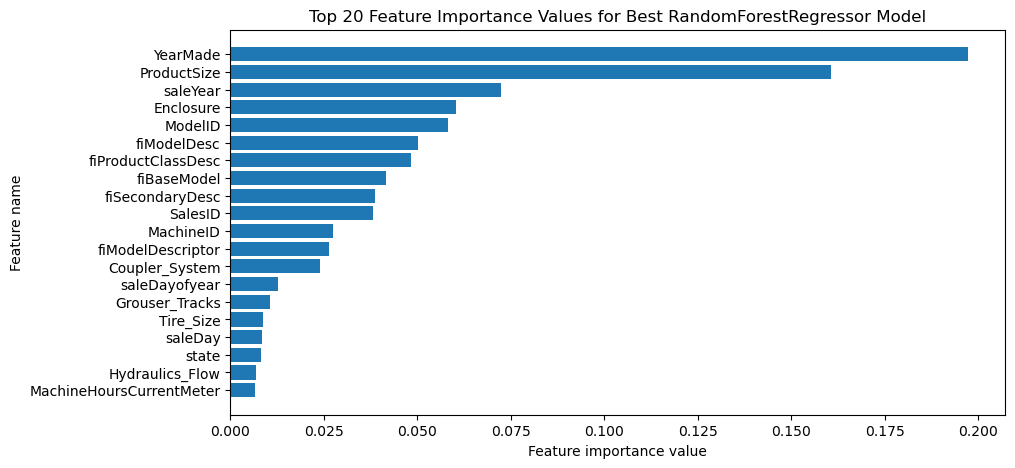

In [118]:
# Plot the top feature importance values
top_n = 20
plt.figure(figsize=(10, 5))
plt.barh(y=feature_importance_df["feature_names"][:top_n], # Plot the top_n feature importance values
         width=feature_importance_df["feature_importance"][:top_n])
plt.title(f"Top {top_n} Feature Importance Values for Best RandomForestRegressor Model")
plt.xlabel("Feature importance value")
plt.ylabel("Feature name")
plt.gca().invert_yaxis();

* `YearMade` - Year of manufacture of the machine.
* `ProductSize` - Size of the bulldozer.
* `Enclosure` - Type of bulldozer enclosure (e.g. OROPS = Open Rollover Protective Structures, EROPS = Enclosed Rollover Protective Structures).
* `saleYear` - The year the bulldozer was sold (this is one of our engineered features from `saledate`).

In [119]:
print(f"[INFO] Unique ProductSize values: {train_df['ProductSize'].unique()}")
print(f"[INFO] Unique Enclosure values: {train_df['Enclosure'].unique()}")

[INFO] Unique ProductSize values: ['Medium' nan 'Compact' 'Small' 'Large' 'Large / Medium' 'Mini']
[INFO] Unique Enclosure values: ['OROPS' 'EROPS' 'EROPS w AC' nan 'EROPS AC' 'NO ROPS'
 'None or Unspecified']


# Summary of Bulldozer Price Prediction Project

In this project, we aimed to predict the sale prices of bulldozers using machine learning techniques. Here are the key takeaways from our work:

* **Understanding the Problem**: The primary goal was to predict the sale prices of bulldozers based on various features in the dataset. This problem is classified as a regression task, where we aim to estimate a continuous value.

* **Data Exploration and Preprocessing**: We began by exploring the dataset to understand its structure and the relationships between different features. Key preprocessing steps included handling missing values, converting categorical variables into numerical formats, and parsing dates. This step is crucial as the quality of the data directly impacts the model's performance.

* **Feature Engineering**: We created new features from existing ones to enhance the model's predictive power. This included extracting useful information from date fields and encoding categorical variables. Effective feature engineering can significantly improve model accuracy.

* **Model Selection and Training**: We experimented with various machine learning models, including linear regression, decision trees, and ensemble methods. Each model was evaluated based on its performance on the validation set, allowing us to identify the best-performing model.

* **Model Evaluation**: We emphasized the importance of keeping a separate test set to evaluate the model's performance on unseen data. This step is critical to ensure that our model generalizes well to new data and does not overfit to the training set.

* **Final Model and Predictions**: After thorough experimentation and evaluation, we selected the best model for predicting bulldozer prices. We then used this model to make predictions on the test set and assessed its accuracy.

* **Key Learnings**:
  - Every machine learning problem is unique, requiring tailored approaches.
  - An experimental mindset is essential for discovering effective solutions.
  - Keeping the test set separate is crucial for evaluating model performance.
  - Consistency in data preprocessing is necessary for accurate predictions.

This project provided valuable insights into the machine learning workflow, from data preprocessing to model evaluation, and highlighted the importance of experimentation and validation in building robust predictive models.

# Conclusion

In this project, we successfully tackled the challenge of predicting bulldozer sale prices using a comprehensive dataset from Kaggle. Our approach involved several key steps:

1. **Data Exploration and Preprocessing**: We began by exploring the dataset to understand its structure and the relationships between various features. This included handling missing values and converting categorical variables into numerical formats.

2. **Feature Engineering**: We enhanced the dataset by creating new features that could improve the model's predictive capabilities, particularly by extracting useful information from date fields.

3. **Model Training and Evaluation**: We experimented with multiple machine learning models, evaluating their performance using Root Mean Squared Logarithmic Error (RMLSE) as our primary metric. This allowed us to identify the most effective model for our predictions.

4. **Final Predictions**: After selecting the best-performing model, we made predictions on the test set and assessed its accuracy.

Through this process, we gained valuable insights into the machine learning workflow, emphasizing the importance of data preprocessing, feature engineering, and model evaluation. Our findings demonstrate the effectiveness of our approach in predicting bulldozer prices, contributing to a deeper understanding of regression tasks in machine learning.